# Banking Customer Churn
Understanding Customer Behavior and Predicting Churn in Banking Institutions

The data commes from: [Banking Customer Churn Prediction Dataset](https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset) on kaggle.com  


### Data dictionary (Features of each customer)

**RowNumber:** The sequential number assigned to each row in the dataset.

**CustomerId:** A unique identifier for each customer.

***Surname:*** The surname of the customer.

***CreditScore:*** The credit score of the customer.

***Geography:*** The geographical location of the customer (e.g., country or region).

***Gender:*** The gender of the customer.

***Age:*** The age of the customer.

***Tenure:*** The number of years the customer has been with the bank.

***Balance:*** The account balance of the customer.

***NumOfProducts:*** The number of bank products the customer has.

***HasCrCard:*** Indicates whether the customer has a credit card (binary: yes/no).

***IsActiveMember:*** Indicates whether the customer is an active member (binary: yes/no).

***EstimatedSalary:*** The estimated salary of the customer.

***Exited:*** Indicates whether the customer has exited the bank (binary: **yes = 1 / no = 0**).

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setting maximal number of displayed columnes
pd.set_option('display.max_columns', 20)

# read data
df = pd.read_csv("Churn_Modelling.csv")
display(df.head(15))

# Disabling scientific notation for floating-point numbers
# pd.options.display.float_format = '{:,.0f}'.format
# pd.reset_option('display.float_format')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [2]:
#deleting unnecessary column
df = df.drop('RowNumber', axis=1)

In [3]:
#checking datatypes
display(df.dtypes)

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
# changing data types
df['CustomerId'] = df['CustomerId'].astype('string')
df['Surname'] = df['Surname'].astype('string')

In [5]:
#df['Geography'] = df['Geography'].map({'Spain':1,'France':2,'Germany':3,})
#df['Geography'] = pd.to_numeric(df['Geography'], downcast='integer')
#df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})
#df['Gender'] = pd.to_numeric(df['Gender'], downcast='integer')

In [6]:
# List of columns to be converted to 'category' type
category_columns = ['Geography',
                    'Gender',
                    'HasCrCard',
                    'IsActiveMember',
                    'Exited']

# Convert each of above columns to 'category' type
for column in category_columns:
    df[column] = df[column].astype('category')

In [7]:
#checking datatypes after changes
display(df.dtypes)

CustomerId         string[python]
Surname            string[python]
CreditScore                 int64
Geography                category
Gender                   category
Age                         int64
Tenure                      int64
Balance                   float64
NumOfProducts               int64
HasCrCard                category
IsActiveMember           category
EstimatedSalary           float64
Exited                   category
dtype: object

,Retainers,Churners
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


,Retainers,Churners
Geography,,
France,83.85%,16.15%
Germany,67.56%,32.44%
Spain,83.33%,16.67%


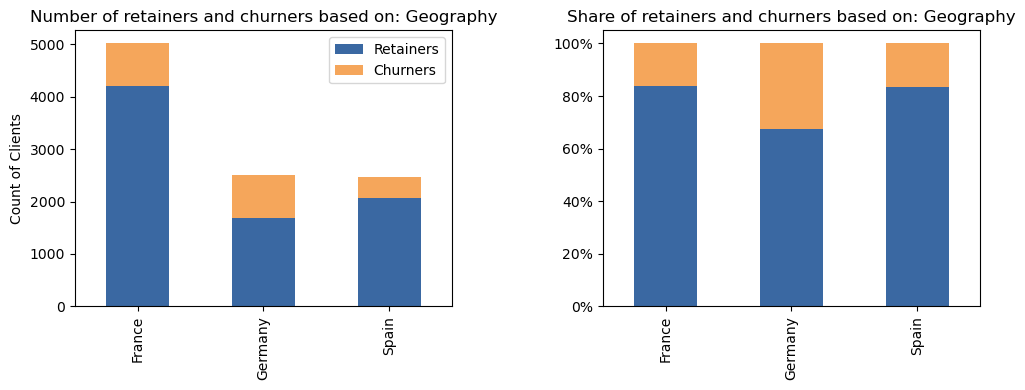

,Retainers,Churners
Gender,,
Female,3404,1139
Male,4559,898


,Retainers,Churners
Gender,,
Female,74.93%,25.07%
Male,83.54%,16.46%


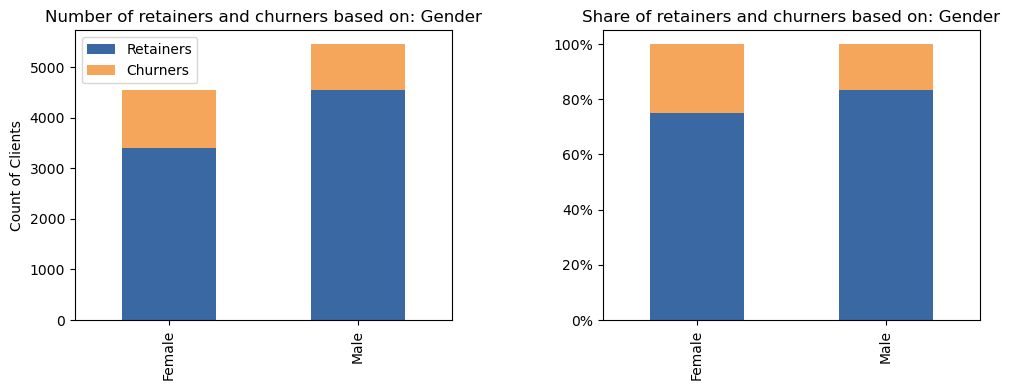

,Retainers,Churners
HasCrCard,,
0,2332,613
1,5631,1424


,Retainers,Churners
HasCrCard,,
0,79.19%,20.81%
1,79.82%,20.18%


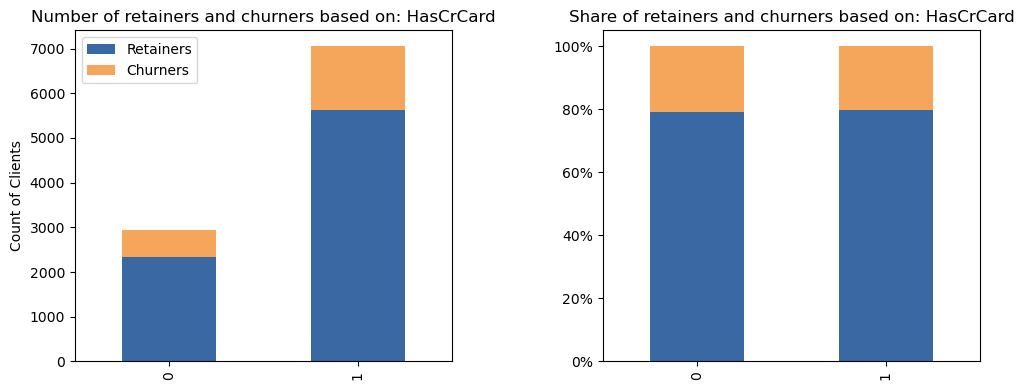

,Retainers,Churners
IsActiveMember,,
0,3547,1302
1,4416,735


,Retainers,Churners
IsActiveMember,,
0,73.15%,26.85%
1,85.73%,14.27%


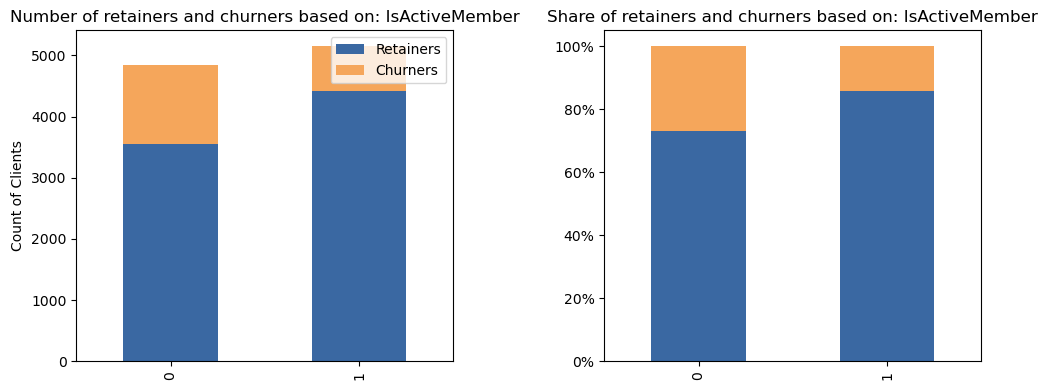

,Retainers,Churners
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


,Retainers,Churners
NumOfProducts,,
1,72.29%,27.71%
2,92.42%,7.58%
3,17.29%,82.71%
4,0.00%,100.00%


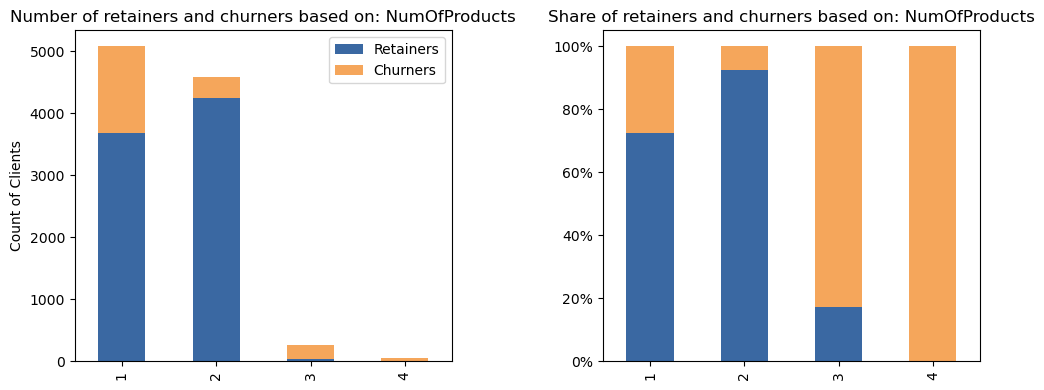

In [8]:
# Analyzing customer churn based on categorical features and NumOfProducts


from matplotlib.ticker import PercentFormatter

selected_features = ['Geography',
                    'Gender',
                    'HasCrCard',
                    'IsActiveMember',
                    'NumOfProducts']

for feature in selected_features:
    #df[feature] = df[feature].astype('category')


    # creating crosstab
    Category_crosstab = pd.crosstab(df[feature], df['Exited'])
    Category_crosstab.columns = ['Retainers', 'Churners']
    display(Category_crosstab)

    # Creating crosstab with normalization
    Category_crosstab_norm = pd.crosstab(df[feature], df['Exited'], normalize='index')
    Category_crosstab_norm = Category_crosstab_norm.map(lambda x: f'{x:.2%}') # float into str
    Category_crosstab_norm.columns = ['Retainers', 'Churners']
    display(Category_crosstab_norm)


    # Creating the figure and two axes
    fig, axes = plt.subplots(1, 2, figsize=(10, 4)) 

    # Subplot 1- clients count
    Category_crosstab.reset_index().plot(
        kind='bar',
        x=feature,
        stacked=True,
        color=['#3a68a2', '#f5a65b'],
        legend=True,
        ax=axes[0]  # Setting on the first plot
    )
    axes[0].set_title('Number of retainers and churners based on: {}'.format(feature))
    axes[0].set_xlabel(None)
    axes[0].set_ylabel('Count of Clients')

    # Subplot 2- clients share
    Category_crosstab_norm = Category_crosstab_norm.map(lambda x: float(x.strip('%')) / 100) # str into float
    Category_crosstab_norm.reset_index().plot(
        kind='bar',
        x=feature,
        stacked=True,
        color=['#3a68a2', '#f5a65b'],
        legend=False,
        ax=axes[1]  # Setting on the secound plot
    )
    axes[1].set_title('Share of retainers and churners based on: {}'.format(feature))
    axes[1].set_xlabel(None)
    #axes[1].set_ylabel('Share of Clients [%]')
    axes[1].yaxis.set_major_formatter(PercentFormatter(1))

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.4) 
    plt.show()

In [9]:
# read statistics
display(df.describe().round(2))

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,650.53,38.92,5.01,76485.89,1.53,100090.24
std,96.65,10.49,2.89,62397.41,0.58,57510.49
min,350.00,18.00,0.00,0.00,1.00,11.58
25%,584.00,32.00,3.00,0.00,1.00,51002.11
50%,652.00,37.00,5.00,97198.54,1.00,100193.92
75%,718.00,44.00,7.00,127644.24,2.00,149388.25
max,850.00,92.00,10.00,250898.09,4.00,199992.48


In [10]:
#checking Nans
print("\nNaN values per column:")
display(df.isna().sum())


NaN values per column:


CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
#checking duplicates

duplicates = df.duplicated()
duplicate_count = duplicates.sum()
print('Number of duplicate rows:', duplicate_count)

Number of duplicate rows: 0


In [12]:
# checking unique values per column
print('Unique values per column:\n\n', df.nunique())

Unique values per column:

 CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64


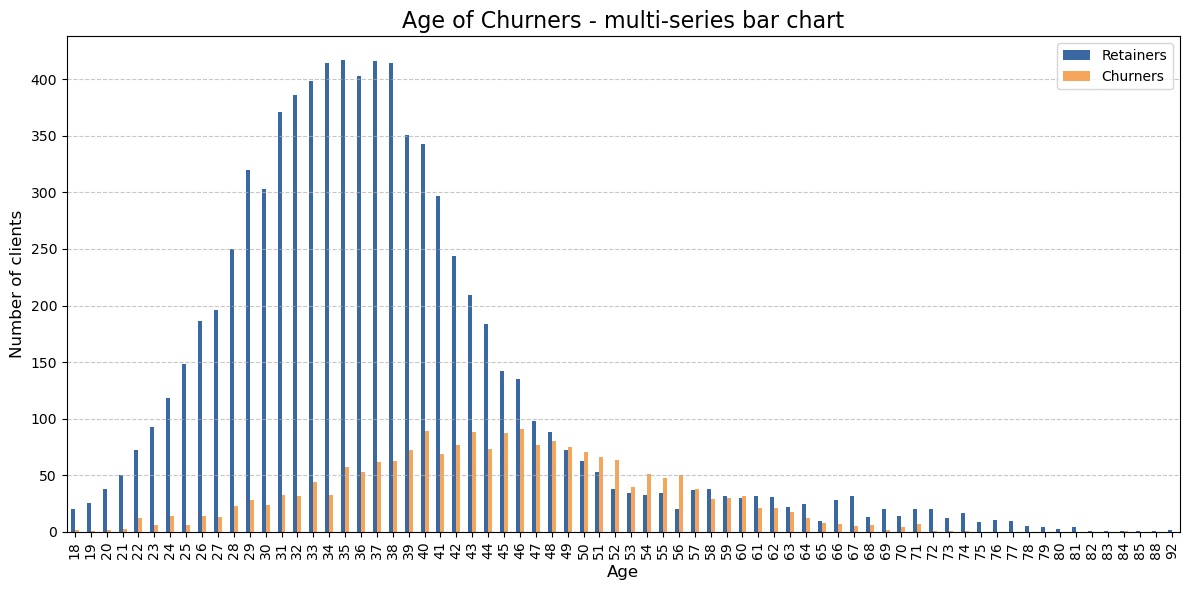

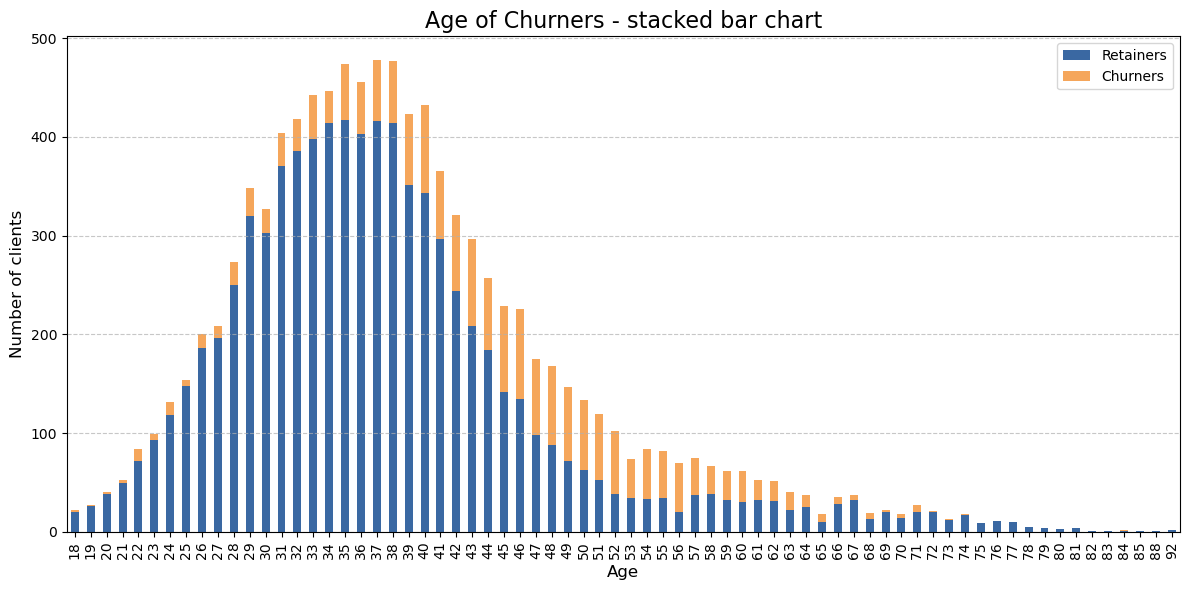

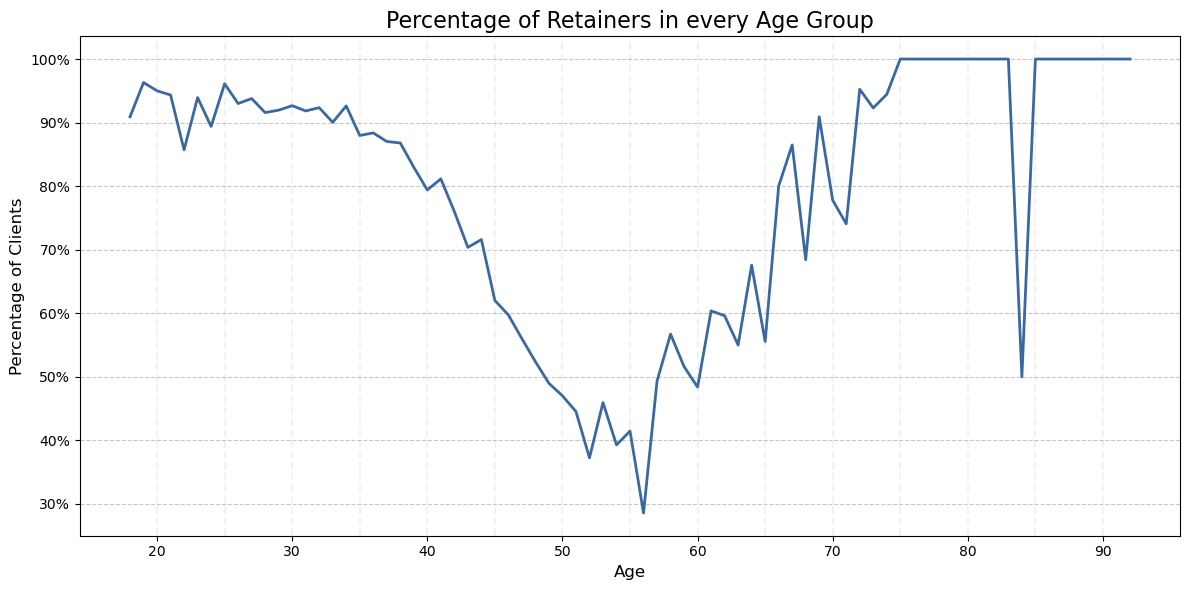

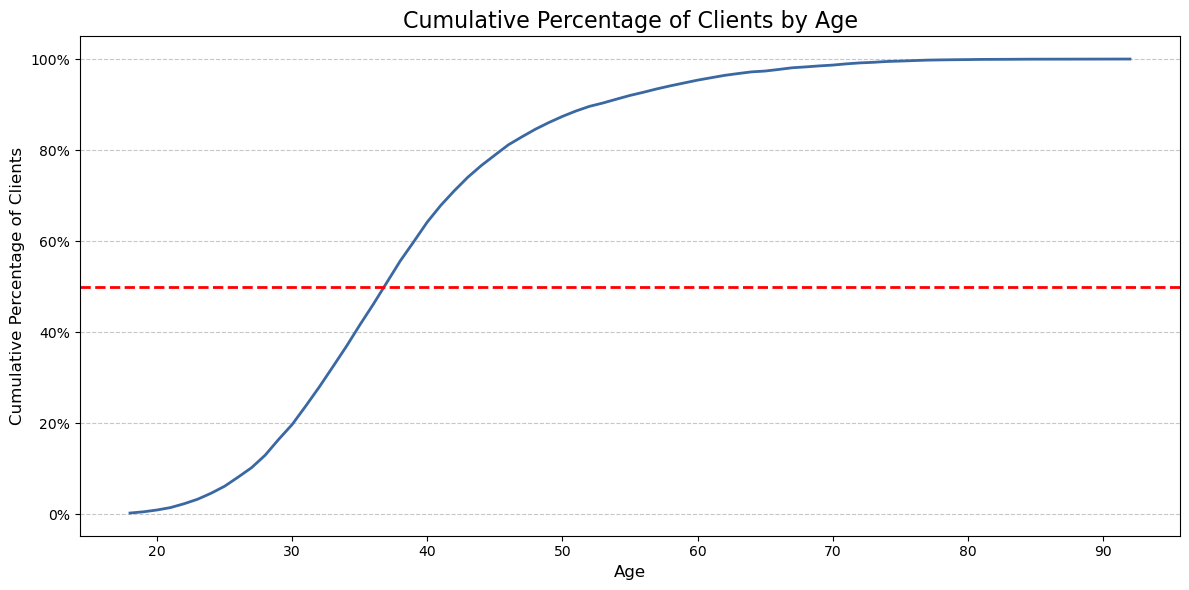

In [13]:
# Selective analysis of features: Age

# Grouping data
grouped = df.groupby(['Age', 'Exited'], observed=True).size().unstack(fill_value=0)

# Creating plot 1
grouped.plot(
    kind='bar', 
    stacked=False, 
    figsize=(12, 6), 
    color=['#3a68a2', '#f5a65b']
)
plt.title('Age of Churners - multi-series bar chart', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of clients', fontsize=12)
plt.legend(['Retainers', 'Churners'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Creating plot 2
grouped.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 6), 
    color=['#3a68a2', '#f5a65b']
)
plt.title('Age of Churners - stacked bar chart', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of clients', fontsize=12)
plt.legend(['Retainers', 'Churners'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Creating plot 3

# Normalize the data to show percentages
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Creating line plot for percentage of Retainers
ax = grouped_percentage[0].plot(
    kind='line',  # Line plot for Retainers (Exited=0)
    figsize=(12, 6), 
    color='#3a68a2', 
    linewidth=2
)

# Adding title and labels
plt.title('Percentage of Retainers in every Age Group', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Percentage of Clients', fontsize=12)

# Formatting the y-axis as percentage
ax.yaxis.set_major_formatter(PercentFormatter(100))

# Adding dashed vertical lines at every 5 units on the x-axis
for i in range(20, max(grouped_percentage.index), 5):
    plt.axvline(x=i, color='gray', linestyle='--', alpha=0.1)
# Adding grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout
plt.tight_layout()

# Display plot
plt.show()


# Creating Plot 4

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Grouping data by age
age_grouped = df.groupby('Age').size()

# Normalize the data to get percentages
age_percentage = age_grouped / age_grouped.sum() * 100

# Calculate cumulative percentage
cumulative_percentage = age_percentage.cumsum()

# Creating the cumulative percentage plot
plt.figure(figsize=(12, 6))
cumulative_percentage.plot(kind='line', color='#3a68a2', linewidth=2)

# Adding title and labels
plt.title('Cumulative Percentage of Clients by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Cumulative Percentage of Clients', fontsize=12)

# Format the y-axis as percentage
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))

# Adding grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a horizontal dashed line at 50%
plt.axhline(y=50, color='red', linestyle='--', linewidth=2)

# Tight layout
plt.tight_layout()

# Display plot
plt.show()




In [14]:
# Calculating the boundary age for the youngest 50% of clients
boundary_age = df['Age'].quantile(0.5)

# Displaying the boundary age
print(f'Boundary age for the youngest 50% of clients: {boundary_age}')

Boundary age for the youngest 50% of clients: 37.0


### Conclusions
- Boundary age for the youngest 50% of clients: 37
- After the age of 37, the share of retainers declines significantly
- Customers of age between 49 and 57 are mostly churners
- Groups of customers older than 60 are mostly retainers, however, their numbers are not large.

### Analysing distribution of the numerical features

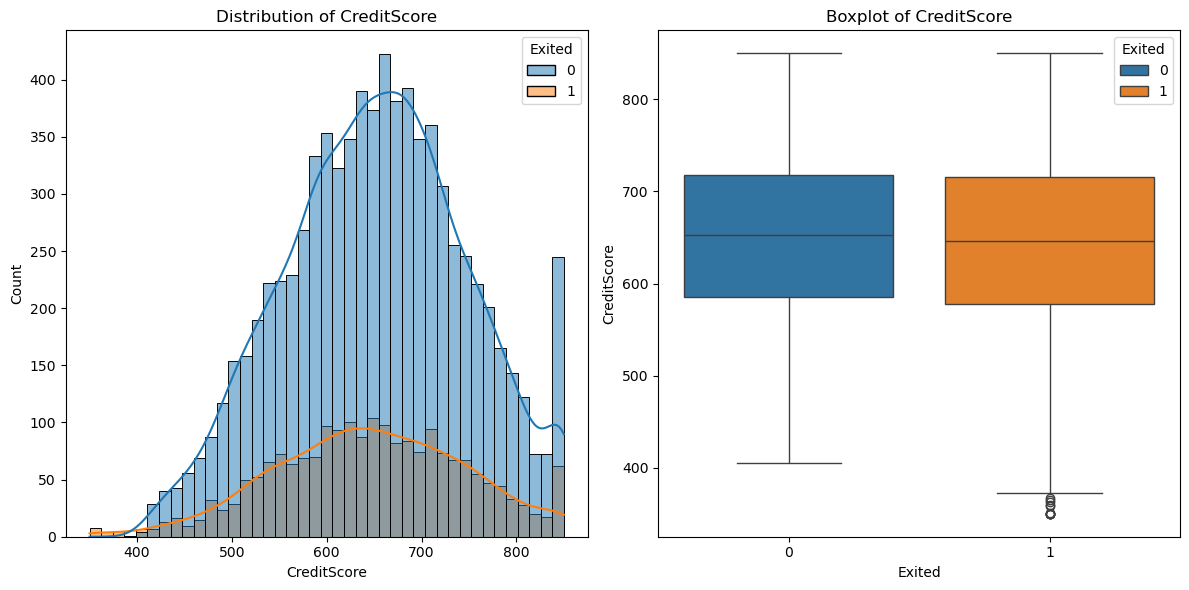

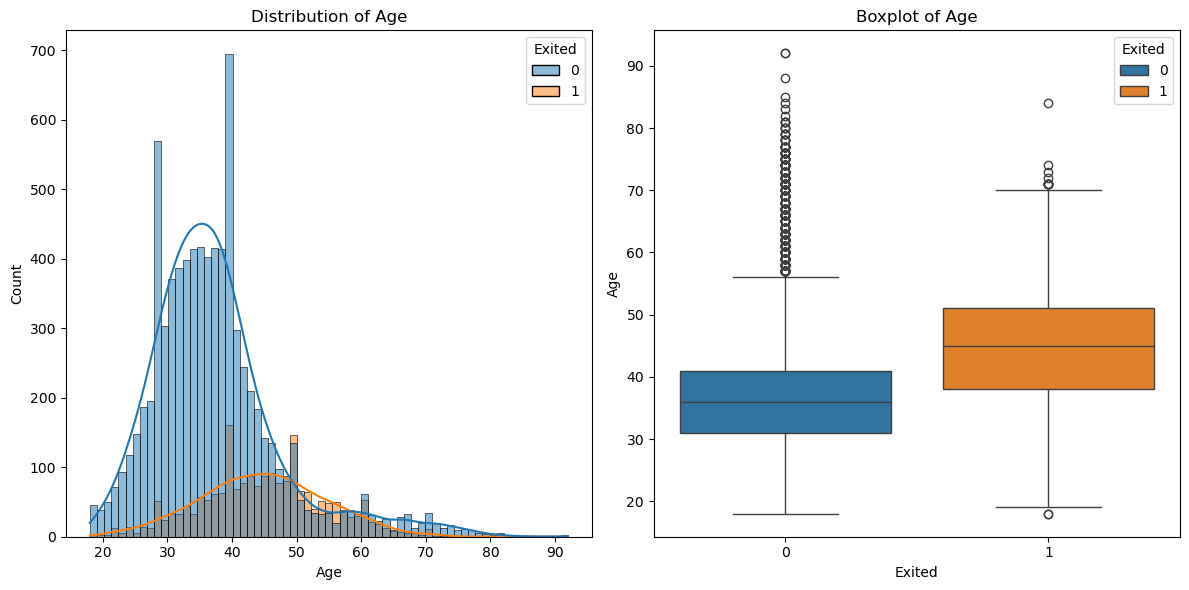

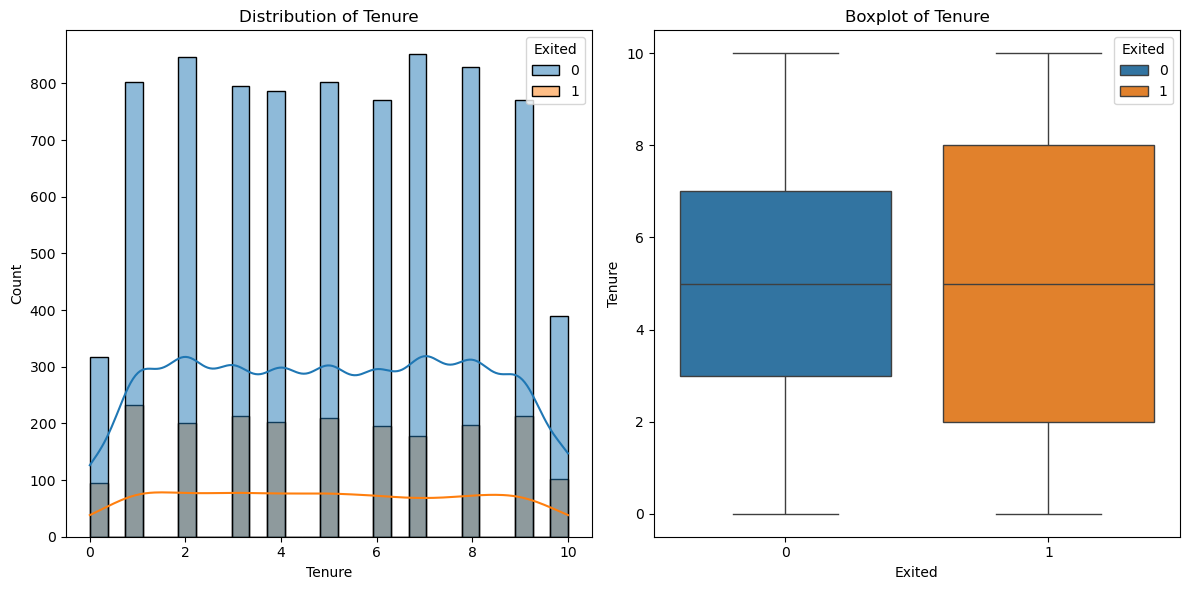

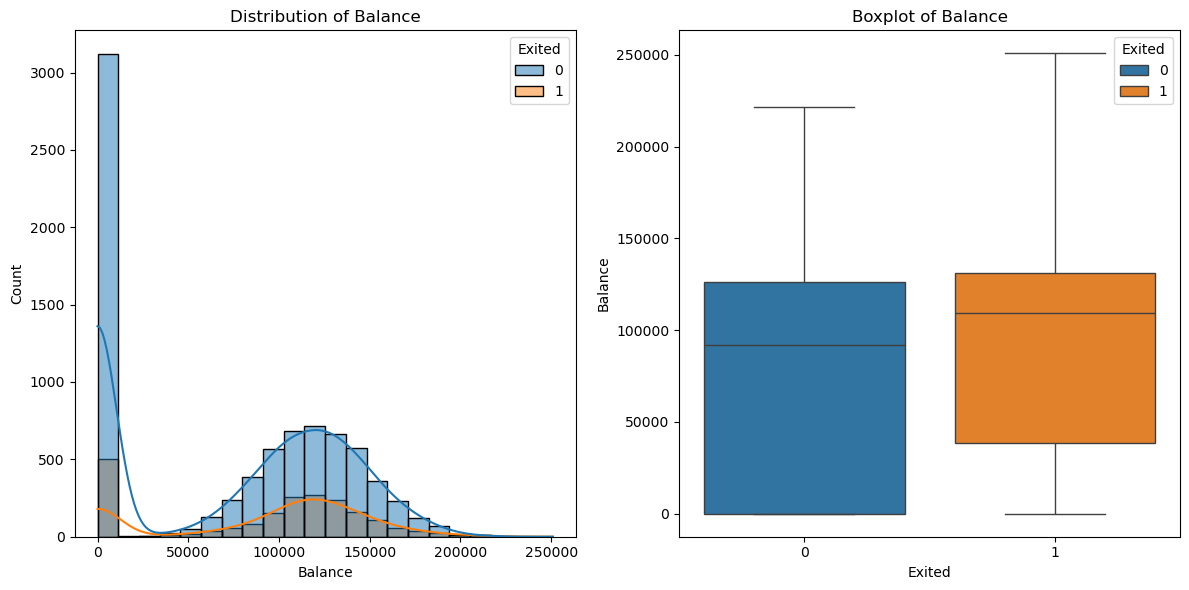

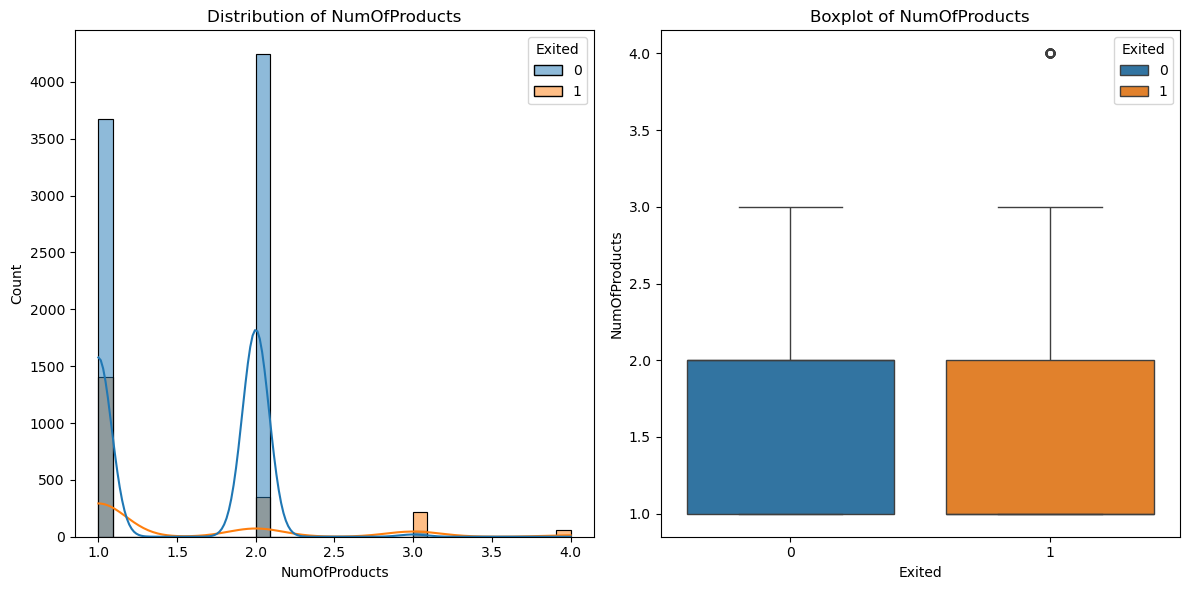

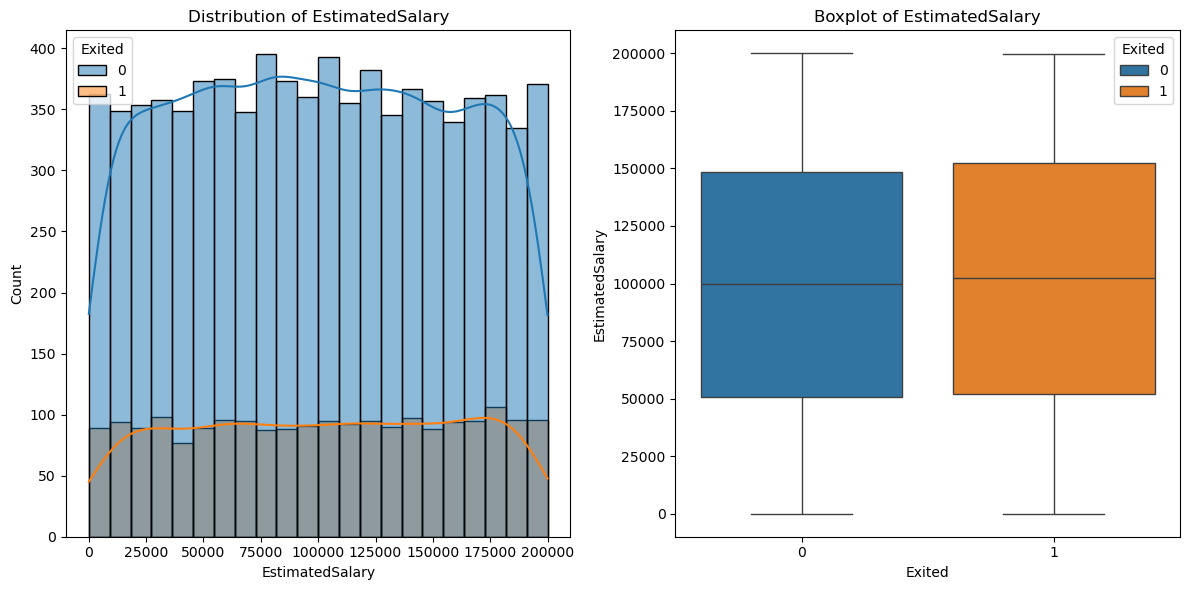

In [15]:
# Distribution of the numerical columnes

# Selection of numerical columns
df_numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Visualization of distributions
for column in df_numeric_columns:
    plt.figure(figsize=(12, 6))
    
    # Distribution with distplot
    plt.subplot(1, 2, 1) # one row, two columns, first column from the left
    sns.histplot(data=df, x=column, kde=True, hue='Exited')
    #sns.histplot(features_with_target[column], kde=True, hue='Exited'  )
    plt.title(f'Distribution of {column}')
    
    # Boxplot to identify outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(x='Exited', y=df[column], data=df, hue='Exited')
    #sns.boxplot(x=features_with_target[column], hue='Exited')
    plt.title(f'Boxplot of {column}')
    
    plt.tight_layout()
    plt.show()


In [16]:
# dealing with outliers:

# there is no impossible values in the data set

### Visualizing relationships between features with pairplot, categorized by churn status

In [17]:
# pairplot
# pairplot = sns.pairplot(df, hue = 'Exited',diag_kws={'common_norm': True})

### Conclusions
After the first glance, churn is mostly observed for:
- Age between 40 and 65
- NumOfProducts of 3 and more
- CreditScore of less than 400
        

### Correlations

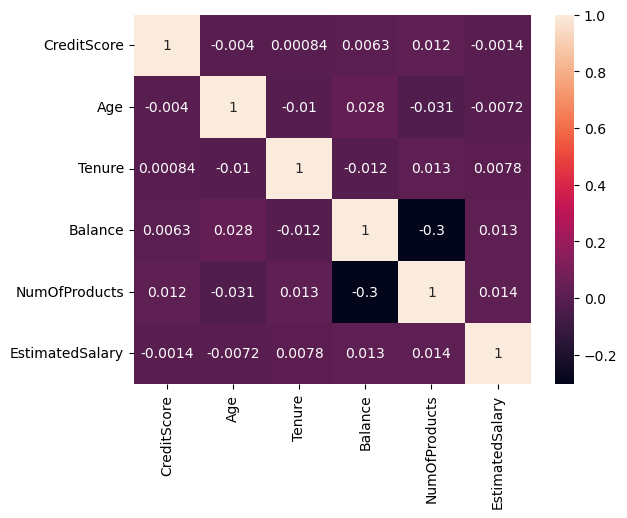

In [18]:
# Correlated features

# Selecting numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64', 'int8' ])

# Correlation visualization
sns.heatmap(numerical_df.corr(), annot=True);

In [19]:
numerical_df.corr().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.00,-0.00,0.00,0.01,0.01,-0.00
Age,-0.00,1.00,-0.01,0.03,-0.03,-0.01
Tenure,0.00,-0.01,1.00,-0.01,0.01,0.01
Balance,0.01,0.03,-0.01,1.00,-0.30,0.01
NumOfProducts,0.01,-0.03,0.01,-0.30,1.00,0.01
EstimatedSalary,-0.00,-0.01,0.01,0.01,0.01,1.00


### Conclusions
The correlations between numerical values are week. The highest is -0.30 between NumOfProducts and Balance.   
It is probably due to the fact that they are synthetic data.

## Checking the balance of the target categories

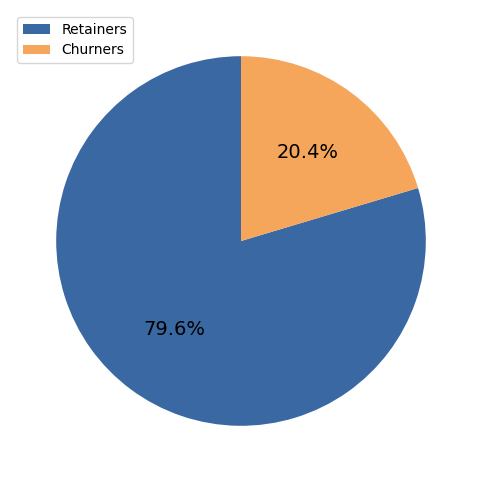

In [20]:
# target data
crosstab = pd.crosstab(index=df['Exited'], columns='count', normalize='columns')
pie_data = crosstab['count']  # transform the crosstab into a simple series for the pie chart
labels = ['Retainers', 'Churners']  # 0: Retainers, 1: Churners

# pie chart
plt.figure(figsize=(6, 6))
colors = ['#3a68a2', '#f5a65b']
plt.pie(
    pie_data, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors, 
    textprops={'fontsize': 14}
)
plt.legend(labels, loc="upper left")
plt.show()

In [21]:
# definiujemy funkcjie ktora bedzie robic cleanning for feature_train and feature_test

def clean_data(df):
    """Returns cleaned DataFrame.
    
    Processes:
        -removing irrelevant columnes
        -transform data into less demanding formats
        
    
    Args: 
        df (pd.DataFrame) : uncleaned DataFrame
        
    Returns:
        df  (pd.DataFrame) : cleaned DataFrame
    
    """

    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)

    # removing unnecessary columns
    df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1)
    
    # convert 'object' to 'category' type
    category_columns = ['Geography']
    for column in category_columns:
        df[column] = df[column].astype('category')

    # convert 'object' to numerical columns
    df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

    # convert numerical columns: data type optimization
    df['Gender'] = df['Gender'].astype('uint8')
    df['HasCrCard'] = df['HasCrCard'].astype('uint8')
    df['IsActiveMember'] = df['IsActiveMember'].astype('uint8')
    df['Age'] = df['Age'].astype('uint8')
    df['Tenure'] = df['Tenure'].astype('uint8')
    df['NumOfProducts'] = df['NumOfProducts'].astype('uint8')
    df['CreditScore'] = df['CreditScore'].astype('uint16')
        
    return df

In [66]:
# perform train-test-split
df = pd.read_csv("Churn_Modelling.csv")

from sklearn.model_selection import train_test_split

target = df.loc[:,'Exited']
features = df.drop('Exited', axis=1)

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            random_state=42,
                                                                            test_size=0.1)

In [67]:
features_test.to_csv('features_test.csv', index=False)

In [51]:
#df = features_train.copy() #######

In [68]:
features_train_cleaned = clean_data(features_train)
features_test_cleaned = clean_data(features_test)

display(features_train_cleaned)
features_train_cleaned.info();

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4896,605,France,0,41,5,91612.91,1,1,1,28427.84
4782,752,France,1,53,8,114233.18,1,1,1,51587.04
1496,569,Spain,0,38,8,0.00,2,0,0,79618.79
1957,710,France,0,54,6,171137.62,1,1,1,167023.95
9171,411,France,1,54,9,0.00,1,0,1,76621.49
...,...,...,...,...,...,...,...,...,...,...
5734,768,France,0,54,8,69712.74,1,1,1,69381.05
5191,682,France,1,58,1,0.00,1,1,1,706.50
5390,735,France,1,38,1,0.00,3,0,0,92220.12
860,667,France,0,43,8,190227.46,1,1,0,97508.04


<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 4896 to 7270
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      9000 non-null   uint16  
 1   Geography        9000 non-null   category
 2   Gender           9000 non-null   uint8   
 3   Age              9000 non-null   uint8   
 4   Tenure           9000 non-null   uint8   
 5   Balance          9000 non-null   float64 
 6   NumOfProducts    9000 non-null   uint8   
 7   HasCrCard        9000 non-null   uint8   
 8   IsActiveMember   9000 non-null   uint8   
 9   EstimatedSalary  9000 non-null   float64 
dtypes: category(1), float64(2), uint16(1), uint8(6)
memory usage: 290.2 KB


In [70]:
 # defining function resample_data()

def resample_data(x, y):
    from imblearn.over_sampling import RandomOverSampler
    ros = RandomOverSampler(random_state=42)
    features_resampled, target_resampled = ros.fit_resample(x, y)
    pd.crosstab(index=target_resampled,
            columns='count')
    return  features_resampled, target_resampled 

In [71]:
# applying function resample_data()
features_train_resampled, target_train_resampled = resample_data(features_train_cleaned, target_train)

# checking balance after resampling
pd.crosstab(index=target_train_resampled,
            columns='count')

col_0,count
Exited,
0,7154
1,7154


In [72]:
features_train_resampled.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [73]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Definiowanie kolumn
categorical_columns = ['Geography']
numerical_columns = [
                     'CreditScore',
                     'Age',
                     'Tenure',
                     'Balance', 
                     'NumOfProducts', 
                     'EstimatedSalary'] 
boolean_columns = [
                   'HasCrCard', 
                   'IsActiveMember', 
                   'Gender']
 

#polynomial_columnes = [''Age', 'Balance', EstimatedSalary', 'CreditScore]

# Pipeline dla kolumn kategorycznych
cat_pipe = Pipeline(steps=[('ohe', OneHotEncoder()),]) # Kodowanie wartości kategorycznych na postać OneHot

# Pipeline dla kolumn numerycznych
num_pipe = Pipeline(steps=[('std', StandardScaler())]) # Standaryzacja danych numerycznych (średnia = 0, odchylenie standardowe = 1)

# Definiowanie transformacji dla kolumn
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_pipe, categorical_columns),  # Przetwarzanie kolumn kategorycznych
        ('num', num_pipe, numerical_columns),  # Przetwarzanie kolumn numerycznych
        ('bool', 'passthrough', boolean_columns),  # Przepuszczenie kolumn logicznych bez zmian
        
    ],
    remainder='drop'  # Usunięcie wszystkich kolumn, które nie zostały wymienione w 'transformers'
)

In [75]:
# Building a pipeline with a Random Forest classifier
r_forest_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Transformations based on the preprocessor
    ('classifier', RandomForestClassifier(random_state=42)) # 
])


In [76]:
from sklearn.metrics import classification_report  # Importowanie funkcji do generowania raportu klasyfikacji
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [77]:
# evaluation of prediction
r_forest_pipe.fit(X=features_train_resampled, y=target_train_resampled)
target_test_pred = r_forest_pipe.predict(X=features_test_cleaned)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

conf_matrix = confusion_matrix(y_true=target_test, y_pred=target_test_pred)
print("Confusion Matrix:\n", conf_matrix)
roc_auc = roc_auc_score(target_test, r_forest_pipe.predict_proba(features_test_cleaned)[:, 1])
print("\nroc_auc:", roc_auc)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       809
           1       0.65      0.54      0.59       191

    accuracy                           0.86      1000
   macro avg       0.77      0.74      0.75      1000
weighted avg       0.85      0.86      0.85      1000

Confusion Matrix:
 [[753  56]
 [ 87 104]]

roc_auc: 0.8533675470330508


In [ ]:
# Defining the search space for hyperparameter tuning
search_space_rf = {
    'classifier__n_estimators': [20, 50, 80], 
    'classifier__max_depth': np.round(np.geomspace(3, 50, num=10)).astype(int),  # Log-scale depths
    'classifier__min_samples_leaf': [5, 10, 20]  # Leaf size variations 
}

# Grid search with cross-validation and parallel computation
rf_grid_search = GridSearchCV(
    estimator=r_forest_pipe,
    param_grid=search_space_rf,
    scoring='f1',  # Optimizing for f1-score
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Utilize all available CPU cores
    verbose=1  # Show progress during training
)

# Fitting the model using resampled training data
rf_grid_search.fit(features_train_resampled, target_train_resampled)
display(rf_grid_search)

# Printing the best model and its score
print("Best Model:\n", rf_grid_search.best_estimator_)
print("\nBest f1 Score:", rf_grid_search.best_score_)
print("\nBest Parameters:\n", rf_grid_search.best_estimator_.get_params());


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Model:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Geography']),
                                                 ('num',
                                                  Pipeline(steps=[('std',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary']),
                                                 ('bool', 'passthrough',
                               

In [62]:
# Random Forest Pipe with best estimators from Grid Search
r_forest_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing danych (transformacje na podstawie preprocessor)
    ('classifier', RandomForestClassifier(
                                          max_depth=20, # 20
                                          n_estimators=80, # 65
                                          min_samples_leaf= 5,
                                          min_samples_split=5,
                                          random_state=42))  # Klasyfikator RandomForest # 
])

r_forest_pipe.fit(X=features_train_resampled, y=target_train_resampled)
target_test_pred = r_forest_pipe.predict(X=features_test_cleaned)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

conf_matrix = confusion_matrix(y_true=target_test, y_pred=target_test_pred)
print("Confusion Matrix:\n", conf_matrix)
roc_auc = roc_auc_score(target_test, r_forest_pipe.predict_proba(features_test_cleaned)[:, 1])
print("\nroc_auc:", roc_auc)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       809
           1       0.58      0.65      0.61       191

    accuracy                           0.84      1000
   macro avg       0.75      0.77      0.76      1000
weighted avg       0.85      0.84      0.85      1000

Confusion Matrix:
 [[717  92]
 [ 66 125]]

roc_auc: 0.8603537429054032


In [63]:
# Extracting and displaying feature importance with transformed feature names

# Wyciąganie RandomForestClassifier z potoku
r_forest_model = r_forest_pipe.named_steps['classifier']

# Uzyskiwanie feature_importances_ z modelu
importances = r_forest_model.feature_importances_

# Uzyskiwanie nazw cech po transformacjach OneHotEncoder
geography_columns = r_forest_pipe.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(input_features= categorical_columns)

# Połączenie wszystkich nazw cech w kolejnosci zgodnej z preprocessor
all_columns = list(geography_columns) + numerical_columns + boolean_columns

# Połączenie nazw cech z ich istotnościami
feature_importances_with_names = zip(all_columns, importances)

# Posortowanie cech według istotności w porządku malejącym
sorted_feature_importances = sorted(feature_importances_with_names, key=lambda x: x[1], reverse=True)

# Wyświetlenie posortowanych wyników z zaokrągleniem do 2 miejsc po przecinku i przekształcenie na procenty
print('Features importance:')
for feature, importance in sorted_feature_importances:
    importance_percent = round(importance * 100, 2)  # Przekształcenie na procenty
    print(f"{feature}: {importance_percent}%")

Features importance:
Age: 30.11%
NumOfProducts: 17.26%
Balance: 12.9%
EstimatedSalary: 10.48%
CreditScore: 10.42%
Tenure: 5.98%
IsActiveMember: 4.36%
Geography_Germany: 2.86%
Gender: 2.15%
HasCrCard: 1.29%
Geography_France: 1.18%
Geography_Spain: 1.0%


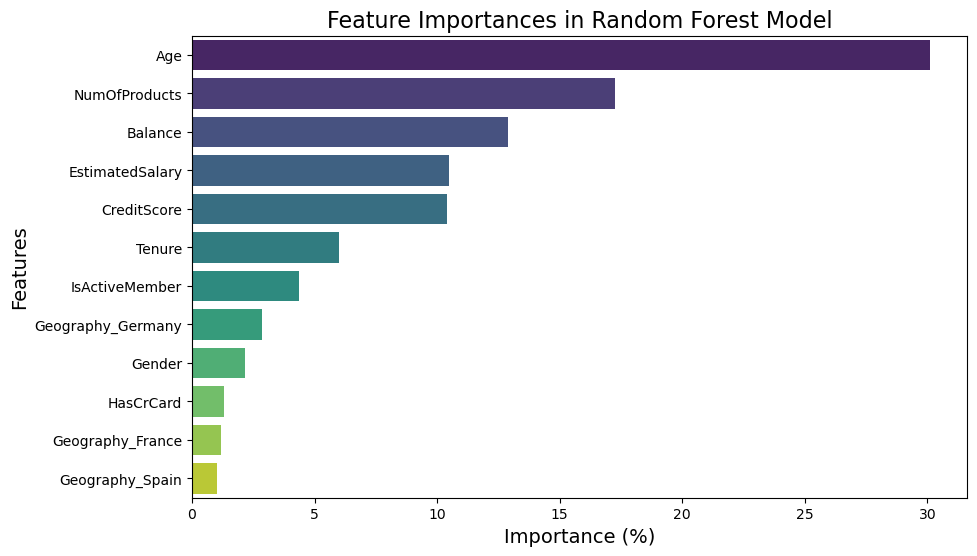

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Uzyskiwanie danych z posortowanymi nazwami cech i ich istotnościami
features = [feature for feature, _ in sorted_feature_importances]
importances_percent = [round(importance * 100, 2) for _, importance in sorted_feature_importances]

# Tworzenie wykresu
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_percent, y=features, palette='viridis')

# Tytuł wykresu
plt.title("Feature Importances in Random Forest Model", fontsize=16)
plt.xlabel("Importance (%)", fontsize=14)
plt.ylabel("Features", fontsize=14)

# Wyświetlenie wykresu
plt.show()


In [37]:
# Pipeline for k-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier
knn_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing danych (transformacje na podstawie preprocessor)
    ('classifier', KNeighborsClassifier())  # Klasyfikator k-Nearest Neighbors
])

# classifikation report for k-nearets neighbours
knn_pipe.fit(X=features_train_resampled, y=target_train_resampled)
target_test_pred = knn_pipe.predict(X=features_test_cleaned)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

conf_matrix = confusion_matrix(y_true=target_test, y_pred=target_test_pred)
print("Confusion Matrix:\n", conf_matrix)
roc_auc = roc_auc_score(target_test, knn_pipe.predict_proba(features_test_cleaned)[:, 1])
print("\nroc_auc:", roc_auc)

              precision    recall  f1-score   support

           0       0.92      0.75      0.83       809
           1       0.41      0.73      0.53       191

    accuracy                           0.75      1000
   macro avg       0.67      0.74      0.68      1000
weighted avg       0.83      0.75      0.77      1000

Confusion Matrix:
 [[609 200]
 [ 51 140]]

roc_auc: 0.7826836829127809


In [38]:
# preparing search grid for knn

k = np.unique(np.geomspace(1, 200, 8, dtype='int'))  # create 8 values between 1 and 200 with increasing distance
search_space_knn = {'classifier__n_neighbors': k,  # use the created values as number of neighbors
                    'classifier__weights': ['uniform', 'distance']
                    }

search_space_knn

{'classifier__n_neighbors': array([  1,   2,   4,   9,  20,  44,  93, 200]),
 'classifier__weights': ['uniform', 'distance']}

In [39]:
# grid search for knn

# knn_grid_search
knn_grid_search = GridSearchCV(estimator=knn_pipe, 
                         param_grid=search_space_knn, 
                         scoring='f1',
                         cv=5) 

knn_grid_search.fit(features_train_resampled, target_train_resampled)

print(knn_grid_search.best_estimator_)
print(knn_grid_search.best_score_)
print("\nBest Parameters:\n", knn_grid_search.best_estimator_.get_params());

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Geography']),
                                                 ('bool', 'passthrough',
                                                  ['HasCrCard',
                                                   'IsActiveMember',
                                                   'Gender']),
                                                 ('num',
                                                  Pipeline(steps=[('std',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                  

In [40]:
# Pipeline for k-Nearest Neighbors with n_neighbors =1 (according to the Grid Search)

from sklearn.neighbors import KNeighborsClassifier
knn_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing danych (transformacje na podstawie preprocessor)
    ('classifier', KNeighborsClassifier(n_neighbors=1, 
                                        weights = 'uniform',
                                        metric = 'minkowski',
                                        p = 2,
                                        ))  # Klasyfikator k-Nearest Neighbors
])

# classifikation report for k-nearets neighbours
knn_pipe.fit(X=features_train_resampled, y=target_train_resampled)
target_test_pred = knn_pipe.predict(X=features_test_cleaned)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

conf_matrix = confusion_matrix(y_true=target_test, y_pred=target_test_pred)
print("Confusion Matrix:\n", conf_matrix)
roc_auc = roc_auc_score(target_test, knn_pipe.predict_proba(features_test_cleaned)[:, 1])
print("\nroc_auc:", roc_auc)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       809
           1       0.49      0.49      0.49       191

    accuracy                           0.81      1000
   macro avg       0.69      0.68      0.68      1000
weighted avg       0.81      0.81      0.81      1000

Confusion Matrix:
 [[713  96]
 [ 98  93]]

roc_auc: 0.6841229881114944


In [41]:
# The result (f1-score) from the classification report for n_neighbors=1 is worse than for n_neighbors=5 (the default value).
# This indicates overfitting of the model. 
# For this reason, let's try to find a better prediction model.

In [42]:
# Pipeline for Logistic Regression Model

from sklearn.linear_model import LogisticRegression
log_reg_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing danych (transformacje na podstawie preprocessor)
    ('classifier', LogisticRegression(random_state=42))  # Klasyfikator Logistic Regression
])

# classifikation report for log_reg
log_reg_pipe.fit(X=features_train_resampled, y=target_train_resampled)
target_test_pred = log_reg_pipe.predict(X=features_test_cleaned)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

conf_matrix = confusion_matrix(y_true=target_test, y_pred=target_test_pred)
print("Confusion Matrix:\n", conf_matrix)
roc_auc = roc_auc_score(target_test, log_reg_pipe.predict_proba(features_test_cleaned)[:, 1])
print("\nroc_auc:", roc_auc)

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       809
           1       0.37      0.72      0.49       191

    accuracy                           0.71      1000
   macro avg       0.64      0.72      0.65      1000
weighted avg       0.81      0.71      0.74      1000

Confusion Matrix:
 [[575 234]
 [ 53 138]]

roc_auc: 0.7747655628110459


In [43]:
# preparing grid search for log_reg
search_space_log = {
    'classifier__solver': ['liblinear'],  # Tylko solver liblinear
    'classifier__penalty': ['l1', 'l2'],  # L1 i L2 regularizacja
    'classifier__C': np.geomspace(0.001, 1000, 14),  # Wartości regularizacji (od 0.001 do 1000)
    'classifier__max_iter': [1000, 5000],  # Liczba iteracji
    'classifier__tol': [1e-4, 1e-3],  # Tolerancja zbieżności
    'classifier__fit_intercept': [True, False]  # Wyraz wolny
}
    # Wyświetlenie przestrzeni wyszukiwania
search_space_log

{'classifier__solver': ['liblinear'],
 'classifier__penalty': ['l1', 'l2'],
 'classifier__C': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
        7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
        4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
        3.45510729e+02, 1.00000000e+03]),
 'classifier__max_iter': [1000, 5000],
 'classifier__tol': [0.0001, 0.001],
 'classifier__fit_intercept': [True, False]}

In [44]:
# running grid serch for log_reg
log_grid_search = GridSearchCV(estimator=log_reg_pipe,
                         param_grid=search_space_log, #search_space_log,
                         scoring='f1', #  for Exited = 1
                         cv=5)

log_grid_search.fit(features_train_resampled, target_train_resampled)

print(log_grid_search.best_estimator_)
print(log_grid_search.best_score_)
print("\nBest Parameters:\n", log_grid_search.best_estimator_.get_params());

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Geography']),
                                                 ('bool', 'passthrough',
                                                  ['HasCrCard',
                                                   'IsActiveMember',
                                                   'Gender']),
                                                 ('num',
                                                  Pipeline(steps=[('std',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                  

In [45]:
# Pipeline for Logistic Regression Model with best estimator

log_reg_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing danych (transformacje na podstawie preprocessor)
    ('classifier', LogisticRegression(C=0.008376776400682925,
                                      max_iter=1000,
                                      random_state=42, 
                                      solver='liblinear',
                                      penalty = 'l1',
                                      tol=0.001,
                                      fit_intercept = True))  # Klasyfikator Logistic Regression
])

# classifikation report for log_reg
log_reg_pipe.fit(X=features_train_resampled, y=target_train_resampled)
target_test_pred = log_reg_pipe.predict(X=features_test_cleaned)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

conf_matrix = confusion_matrix(y_true=target_test, y_pred=target_test_pred)
print("Confusion Matrix:\n", conf_matrix)
roc_auc = roc_auc_score(target_test, log_reg_pipe.predict_proba(features_test_cleaned)[:, 1])
print("\nroc_auc:", roc_auc)

              precision    recall  f1-score   support

           0       0.92      0.72      0.81       809
           1       0.38      0.73      0.50       191

    accuracy                           0.72      1000
   macro avg       0.65      0.72      0.65      1000
weighted avg       0.82      0.72      0.75      1000

Confusion Matrix:
 [[582 227]
 [ 52 139]]

roc_auc: 0.7724551673257011


In [ ]:
# The f1-score has increased only slightly
# # Let's search for other prediction model

In [98]:
from sklearn.preprocessing import PolynomialFeatures

# Definiowanie kolumn
categorical_columns = ['Geography']  # Kolumny kategoryczne

numerical_columns = [
                    'Tenure',
                    #'NumOfProducts'
                    ]  # Kolumny numeryczne

boolean_columns = ['HasCrCard', 'IsActiveMember', 'Gender']  # Kolumny logiczne

polynomial_columnes = ['Age', 'Balance', 'EstimatedSalary', 'CreditScore', 'NumOfProducts']
# powinny to byc kolumny numeryczne ciagle, nieskorelowane ze soba, 

# Pipeline dla kolumn kategorycznych
cat_pipe = Pipeline(steps=[('ohe', OneHotEncoder()),]) # Kodowanie wartości kategorycznych na postać OneHot

# Pipeline dla kolumn numerycznych
num_pipe = Pipeline(steps=[('std', StandardScaler())]) # Standaryzacja danych numerycznych (średnia = 0, odchylenie standardowe = 1)

# Pipeline dla polynomial columns
poly_pipe = Pipeline(steps=[('std', StandardScaler()), 
                            ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False))])

# Definiowanie transformacji dla kolumn
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_pipe, categorical_columns),  # Przetwarzanie kolumn kategorycznych
        ('num', num_pipe, numerical_columns),  # Przetwarzanie kolumn numerycznych
        ('bool', 'passthrough', boolean_columns),  # Przepuszczenie kolumn logicznych bez zmian
        ('pol', poly_pipe, polynomial_columnes),
        
    ],
    remainder='drop'  # Usunięcie wszystkich kolumn, które nie zostały wymienione w 'transformers'
)

In [99]:
# Tworzenie potoku dla modelu
r_forest_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing danych (transformacje na podstawie preprocessor)
    # besten 10 features selectKBest
    ('classifier', RandomForestClassifier()) # Klasyfikator RandomForest
])  

In [100]:
# evaluation of prediction
r_forest_pipe.fit(X=features_train_resampled, y=target_train_resampled)
target_test_pred = r_forest_pipe.predict(X=features_test_cleaned)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

conf_matrix = confusion_matrix(y_true=target_test, y_pred=target_test_pred)
print("Confusion Matrix:\n", conf_matrix)
roc_auc = roc_auc_score(target_test, r_forest_pipe.predict_proba(features_test_cleaned)[:, 1])
print("\nroc_auc:", roc_auc)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       809
           1       0.63      0.52      0.57       191

    accuracy                           0.85      1000
   macro avg       0.76      0.73      0.74      1000
weighted avg       0.84      0.85      0.85      1000

Confusion Matrix:
 [[751  58]
 [ 91 100]]

roc_auc: 0.8475915583196889


In [101]:
# Sprawdzenie struktury danych w wyniku transformacji preprocesorem (bez tworzenia modelu random forest) 
# - jedynie sprawdzenie, jak wygladaja dane po przeksztalceniu, przed dopasowaniem do nich dowolnego modelu


# Przekształcenie danych treningowych za pomocą preprocessor
transformed_train_features = preprocessor.fit_transform(features_train_resampled)

# Przekształcenie danych testowych za pomocą tego samego preprocessor
#transformed_test_features = preprocessor.transform(features_test_cleaned)

# Pobranie nazw kolumn po każdej transformacji:
# 1. Kolumny z "Geography" po OneHotEncoder
geography_columns = preprocessor.transformers_[0][1].named_steps['ohe'].get_feature_names_out(input_features=['Geography'])

# 3. Kolumny wielomianowe
polynomial_transformer = preprocessor.transformers_[3][1].named_steps['poly']
poly_columns = polynomial_transformer.get_feature_names_out(input_features=polynomial_columnes)

# Połączenie nazw wszystkich cech w odpowiedniej kolejności
all_transformed_columns = list(geography_columns) + numerical_columns + boolean_columns + list(poly_columns) 

# Tworzenie DataFrame z przekształconymi danymi treningowymi
transformed_train_df = pd.DataFrame(transformed_train_features, columns=all_transformed_columns)
transformed_train_df

# Tworzenie DataFrame z przekształconymi danymi testowymi
#transformed_test_df = pd.DataFrame(transformed_test_features, columns=all_transformed_columns)

# Wyświetlenie pełnego DataFrame dla danych treningowych
#display(transformed_train_df)

# Wyświetlenie pełnego DataFrame dla danych testowych
#display(transformed_test_df)

# Przekształcenie danych testowych za pomocą tego samego preprocessor
transformed_test_features = preprocessor.transform(features_test_cleaned)
# Tworzenie DataFrame z przekształconymi danymi testowymi
transformed_test_df = pd.DataFrame(transformed_test_features, columns=all_transformed_columns)

In [102]:
# Dopasowanie r_forest_pipe do danych treningowych
#r_forest_pipe.fit(features_train_resampled, target_train_resampled)

# Wyciąganie modelu RandomForestClassifier z pipeline
rf_poly_model = r_forest_pipe.named_steps['classifier']

# Uzyskiwanie feature_importances_ z modelu
importances = rf_poly_model.feature_importances_

# Uzyskiwanie nazw cech po przetwarzaniu
# 1. Kolumny z "Geography" po OneHotEncoder
#geography_columns = preprocessor.transformers_[0][1].named_steps['ohe'].get_feature_names_out(input_features=['Geography'])

# 2. Kolumny numeryczne
#num_columns = numerical_columns  # Nazwy pozostają takie same po standaryzacji

# 3. Kolumny wielomianowe
#polynomial_transformer = preprocessor.transformers_[3][1].named_steps['poly']
#poly_columns = polynomial_transformer.get_feature_names_out(input_features=polynomial_columnes)

# 4. Kolumny boolowskie
#bool_columns = boolean_columns

# Połączenie wszystkich nazw cech w odpowiedniej kolejności
all_columns = list(geography_columns) + numerical_columns + boolean_columns + list(poly_columns) 

# Połączenie nazw cech z ich ważnościami
feature_importances_with_names = list(zip(all_columns, importances))

# Posortowanie cech według ważności w porządku malejącym
sorted_feature_importances = sorted(feature_importances_with_names, key=lambda x: x[1], reverse=True)

# Wyświetlenie posortowanych cech z ich ważnościami
print("Feature Importances:")
for feature, importance in sorted_feature_importances:
    importance_percent = round(importance * 100, 2)  # Konwersja na procenty
    print(f"{feature}: {importance_percent}%")


Feature Importances:
Age: 11.9%
Balance NumOfProducts: 7.64%
NumOfProducts^2: 6.46%
Age Balance: 5.63%
Age NumOfProducts: 5.42%
Balance: 4.2%
NumOfProducts: 3.8%
Age EstimatedSalary: 3.78%
EstimatedSalary^2: 3.77%
EstimatedSalary NumOfProducts: 3.73%
Age CreditScore: 3.64%
Balance EstimatedSalary: 3.64%
EstimatedSalary CreditScore: 3.57%
Balance CreditScore: 3.45%
EstimatedSalary: 3.41%
CreditScore^2: 3.4%
Balance^2: 3.36%
CreditScore NumOfProducts: 3.34%
CreditScore: 3.11%
Age^2: 2.89%
Tenure: 2.51%
IsActiveMember: 2.47%
Geography_Germany: 1.7%
Gender: 1.13%
Geography_France: 0.75%
Geography_Spain: 0.72%
HasCrCard: 0.62%


In [52]:
#for feature, importance in sorted_feature_importances:
#    print(feature)

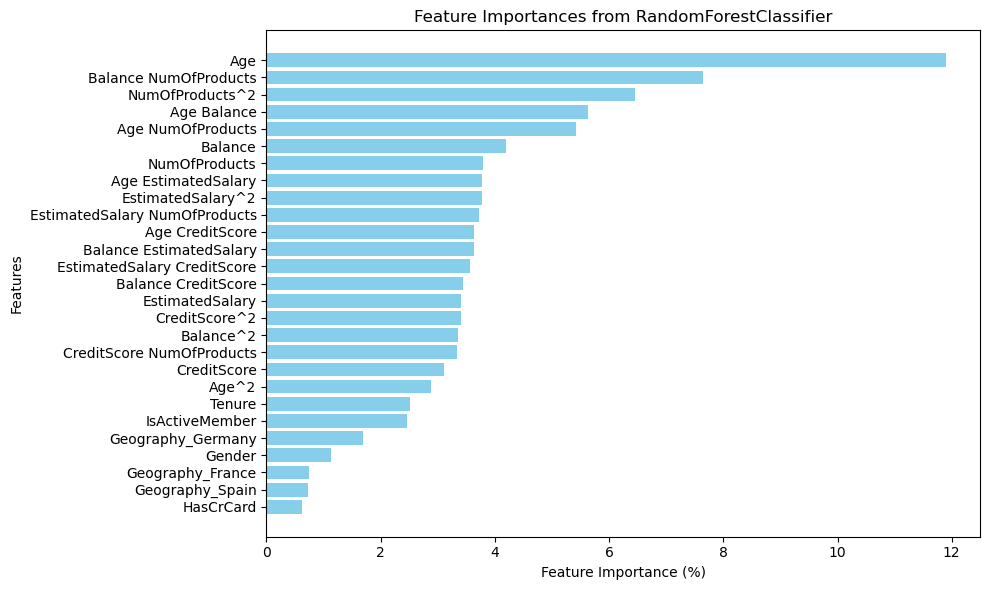

In [103]:
import matplotlib.pyplot as plt

# Ekstrakcja nazw cech i ich ważności z posortowanej listy
features, importances = zip(*sorted_feature_importances)

# Konwersja ważności na procenty
importances_percent = [round(imp * 100, 2) for imp in importances]

# Wizualizacja
plt.figure(figsize=(10, 6))
plt.barh(features, importances_percent, color='skyblue')
plt.xlabel("Feature Importance (%)")
plt.ylabel("Features")
plt.title("Feature Importances from RandomForestClassifier")
plt.gca().invert_yaxis()  # Odwrócenie osi Y, aby najważniejsze cechy były na górze
plt.tight_layout()
plt.show()


In [104]:
# Defining the search space for hyperparameter tuning
search_space_rf = {
    'classifier__n_estimators': [20, 50, 80], 
    'classifier__max_depth': np.round(np.geomspace(3, 50, num=10)).astype(int),  # Log-scale depths
    'classifier__min_samples_leaf': [5, 10, 20]  # Leaf size variations 
}

# Grid search with cross-validation and parallel computation
rf_grid_search = GridSearchCV(
    estimator=r_forest_pipe,
    param_grid=search_space_rf,
    scoring='f1',  # Optimizing for f1-score
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Utilize all available CPU cores
    verbose=1  # Show progress during training
)

# Fitting the model using resampled training data
rf_grid_search.fit(features_train_resampled, target_train_resampled)
display(rf_grid_search)

# Printing the best model and its score
print("Best Model:\n", rf_grid_search.best_estimator_)
print("\nBest f1 Score:", rf_grid_search.best_score_)
print("\nBest Parameters:\n", rf_grid_search.best_estimator_.get_params());

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder())]),
                                                                         ['Geography']),
                                                                        ('num',
                                                                         Pipeline(steps=[('std',
                                                                                          StandardScaler())]),
                                                                         ['Tenure']),
                                                                        ('bool',
                                                                         'passthrough',
                                                                         ['HasCrCard',
                                                                          'IsActiveMember',
                                                                          'Gender']),
                                                                        ('pol',
                                                                         Pipeline(steps=[('std',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False))]),
                                                                         ['Age',
                                                                          'Balance',
                                                                          'EstimatedSalary',
                                                                          'CreditScore',
                                                                          'NumOfProducts'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': array([ 3,  4,  6,  8, 10, 14, 20, 27, 37, 50]),
                         'classifier__min_samples_leaf': [5, 10, 20],
                         'classifier__n_estimators': [20, 50, 80]},
             scoring='f1', verbose=1)

Best Model:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Geography']),
                                                 ('num',
                                                  Pipeline(steps=[('std',
                                                                   StandardScaler())]),
                                                  ['Tenure']),
                                                 ('bool', 'passthrough',
                                                  ['HasCrCard',
                                                   'IsActiveMember',
                                                   'Gender']),
                                                 ('pol',
                                                  Pipeline(ste

In [105]:
# Random Forest Pipe with best estimators from Grid Search
r_forest_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing danych (transformacje na podstawie preprocessor)
    ('classifier', RandomForestClassifier(
                                          max_depth=20, # 20
                                          n_estimators=80, # 65
                                          min_samples_leaf= 5,
                                          min_samples_split=2,
                                          random_state=42))  # Klasyfikator RandomForest # 
])

r_forest_pipe.fit(X=features_train_resampled, y=target_train_resampled)
target_test_pred = r_forest_pipe.predict(X=features_test_cleaned)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

conf_matrix = confusion_matrix(y_true=target_test, y_pred=target_test_pred)
print("Confusion Matrix:\n", conf_matrix)
roc_auc = roc_auc_score(target_test, r_forest_pipe.predict_proba(features_test_cleaned)[:, 1])
print("\nroc_auc:", roc_auc)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       809
           1       0.58      0.65      0.62       191

    accuracy                           0.84      1000
   macro avg       0.75      0.77      0.76      1000
weighted avg       0.85      0.84      0.85      1000

Confusion Matrix:
 [[721  88]
 [ 67 124]]

roc_auc: 0.8564254234107134


In [54]:
# Przekształcenie danych treningowych za pomocą preprocessor
#transformed_train_features = preprocessor.fit_transform(features_train_resampled)

# Przekształcenie danych testowych za pomocą tego samego preprocessor
#transformed_test_features = preprocessor.transform(features_test_cleaned)

# Pobranie nazw kolumn po każdej transformacji:
# 1. Kolumny z "Geography" po OneHotEncoder
#geography_columns = preprocessor.transformers_[0][1].named_steps['ohe'].get_feature_names_out(input_features=['Geography'])

# 2. Kolumny numeryczne po standaryzacji
#num_columns = numerical_columns  # Standaryzacja nie zmienia nazw kolumn

# 3. Kolumny wielomianowe
#polynomial_transformer = preprocessor.transformers_[3][1].named_steps['poly']
#poly_columns = polynomial_transformer.get_feature_names_out(input_features=polynomial_columnes)

# 4. Kolumny boolowskie (przepuszczone bez zmian)
#bool_columns = boolean_columns

# Połączenie nazw wszystkich cech w odpowiedniej kolejności
#all_transformed_columns = list(geography_columns) + num_columns + list(poly_columns) + bool_columns

# Tworzenie DataFrame z przekształconymi danymi treningowymi
#transformed_train_df = pd.DataFrame(transformed_train_features, columns=all_transformed_columns)

# Tworzenie DataFrame z przekształconymi danymi testowymi
#transformed_test_df = pd.DataFrame(transformed_test_features, columns=all_transformed_columns)

# Wyświetlenie pełnego DataFrame dla danych treningowych
#display(transformed_train_df)

# Wyświetlenie pełnego DataFrame dla danych testowych
#display(transformed_test_df)
print ('teraz wyswietli sie blad, bo transformed_test_df nie sa zdefiniowane')

teraz wyswietli sie blad, bo transformed_test_df nie sa zdefiniowane


In [55]:
# Usunięcie kolumn 'Age' oraz 'NumOfProducts' z DataFrame
columns_to_drop = [

'Balance CreditScore',
'EstimatedSalary',
'EstimatedSalary CreditScore',
'CreditScore^2',
'CreditScore',
'Age^2',
'Tenure',
'IsActiveMember',
'Geography_Germany',
'Gender',
'Geography_France',
'HasCrCard',
'Geography_Spain']

columns_to_keep = [
'Age',
'NumOfProducts',
'Age Balance',
'Balance',
'Age EstimatedSalary',
'Balance^2',
'Age EstimatedSalary',
'Balance^2',
'Balance EstimatedSalary',
'Age CreditScore',
'EstimatedSalary^2',
]
transformed_train_features_reduced = transformed_train_df[columns_to_keep]
transformed_test_features_reduced = transformed_test_df[columns_to_keep]

NameError: name 'transformed_test_df' is not defined

In [ ]:
# Tworzenie potoku dla modelu
r_forest_pipe = Pipeline(steps=[    ('classifier', RandomForestClassifier(random_state=42))]) # Klasyfikator RandomForest

In [ ]:
# evaluation of prediction
r_forest_pipe.fit(X=transformed_train_features_reduced, y=target_train_resampled)
target_test_pred = r_forest_pipe.predict(X=transformed_test_features_reduced)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

conf_matrix = confusion_matrix(y_true=target_test, y_pred=target_test_pred)
print("Confusion Matrix:\n", conf_matrix)
roc_auc = roc_auc_score(target_test, r_forest_pipe.predict_proba(transformed_test_features_reduced)[:, 1]) # transformed_test_features_reduced
print("\nroc_auc:", roc_auc)

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       809
           1       0.37      0.41      0.39       191

    accuracy                           0.75      1000
   macro avg       0.61      0.62      0.62      1000
weighted avg       0.76      0.75      0.76      1000

Confusion Matrix:
 [[674 135]
 [112  79]]

roc_auc: 0.6472731508746498


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Definiowanie kolumn
categorical_columns = [
                       'Geography'
                       ]  # Kolumny kategoryczne
boolean_columns = [
                   'HasCrCard', 
                   'IsActiveMember', 
                   #'Gender'
                   ]  # Kolumny logiczne
numerical_columns = [
                    'CreditScore',
                     'Age',
                    # 'Tenure',
                     'Balance', 
                     'NumOfProducts', 
                     'EstimatedSalary'
                     ]  # Kolumny numeryczne
#polynomial_columnes = [''Age', 'Balance', EstimatedSalary', 'CreditScore]

# Pipeline dla kolumn kategorycznych
cat_pipe = Pipeline(steps=[('ohe', OneHotEncoder()),]) # Kodowanie wartości kategorycznych na postać OneHot

# Pipeline dla kolumn numerycznych
num_pipe = Pipeline(steps=[('std', StandardScaler())]) # Standaryzacja danych numerycznych (średnia = 0, odchylenie standardowe = 1)

# Definiowanie transformacji dla kolumn
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_pipe, categorical_columns),  # Przetwarzanie kolumn kategorycznych
        ('num', num_pipe, numerical_columns),  # Przetwarzanie kolumn numerycznych
        # polynomials
        ('bool', 'passthrough', boolean_columns),  # Przepuszczenie kolumn logicznych bez zmian
    ],
    remainder='drop'  # Usunięcie wszystkich kolumn, które nie zostały wymienione w 'transformers'
)

In [ ]:
# Tworzenie potoku dla modelu
r_forest_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing danych (transformacje na podstawie preprocessor)
    # besten 10 features selectKBest
    ('classifier', RandomForestClassifier(random_state=42))]) # Klasyfikator RandomForest

In [ ]:
# evaluation of prediction
r_forest_pipe.fit(X=features_train_resampled, y=target_train_resampled)
target_test_pred = r_forest_pipe.predict(X=features_test_cleaned)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

conf_matrix = confusion_matrix(y_true=target_test, y_pred=target_test_pred)
print("Confusion Matrix:\n", conf_matrix)
roc_auc = roc_auc_score(target_test, r_forest_pipe.predict_proba(features_test_cleaned)[:, 1])
print("\nroc_auc:", roc_auc)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       809
           1       0.62      0.54      0.58       191

    accuracy                           0.85      1000
   macro avg       0.76      0.73      0.74      1000
weighted avg       0.84      0.85      0.85      1000

Confusion Matrix:
 [[746  63]
 [ 87 104]]

roc_auc: 0.8487888220866042


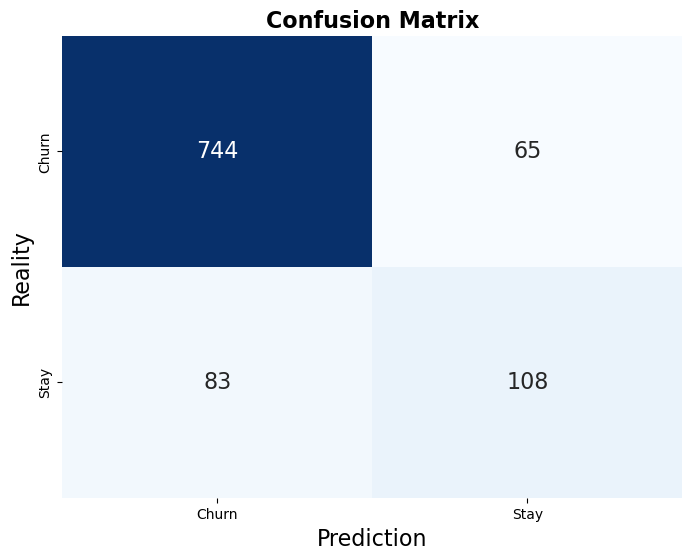

In [ ]:
# Select model

plt.figure(figsize=(8, 6))  # Figure size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Churn', 'Stay'], yticklabels=['Churn', 'Stay'],
            annot_kws={'size': 16})  # Zwiększony rozmiar czcionki wewnątrz komórek

# Title and axis labels
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Prediction', fontsize=16)
plt.ylabel('Reality', fontsize=16)
plt.show()



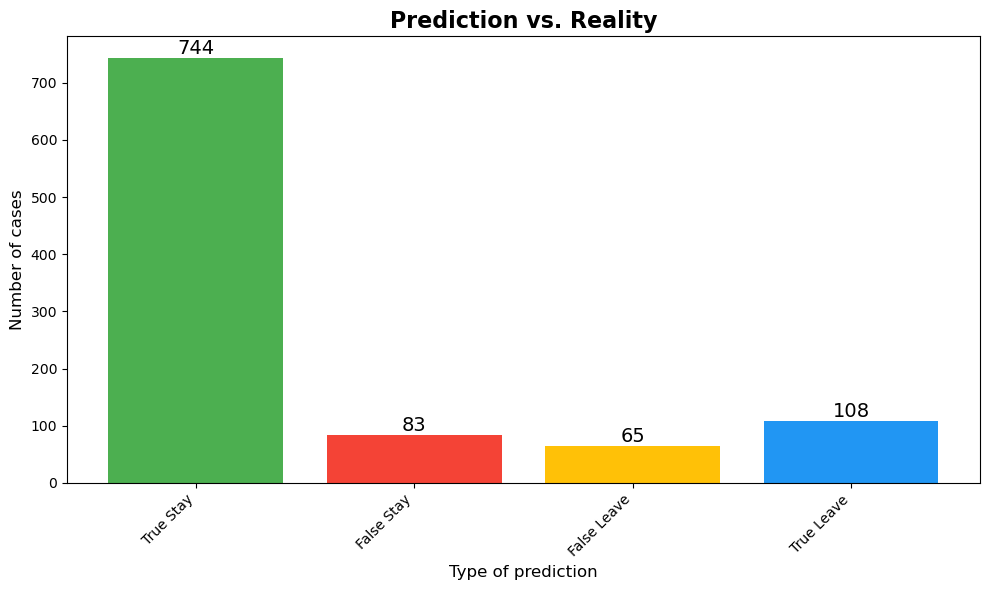

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Zakładamy, że conf_matrix to twoja macierz konfuzji
# conf_matrix = np.array([[TP, FN], [FP, TN]])

fig, ax = plt.subplots(figsize=(10, 6))

labels = ['True Stay', 'False Stay', 'False Leave', 'True Leave']
sizes = [conf_matrix[0, 0], conf_matrix[1, 0], conf_matrix[0, 1], conf_matrix[1, 1]]
colors = ['#4CAF50', '#F44336', '#FFC107', '#2196F3']  # Zamiana czerwonego z żółtym

ax.bar(labels, sizes, color=colors)

plt.title('Prediction vs. Reality', fontsize=16, fontweight='bold')
plt.xlabel('Type of prediction', fontsize=12)
plt.ylabel('Number of cases', fontsize=12)

# Dodanie etykiet z wartościami na słupkach
for i, v in enumerate(sizes):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
print('The End')

The End
